In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers , models

In [3]:
(training_images , training_labels), (testing_images,testing_labels) = datasets.cifar10.load_data()

training_images , testing_images = training_images/255 , testing_images/255

170498071/170498071 [==============================] - 4s 0us/step


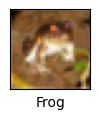

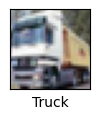

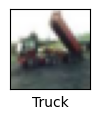

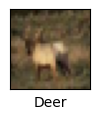

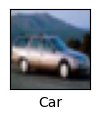

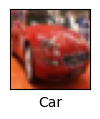

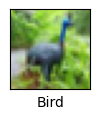

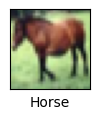

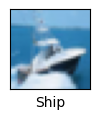

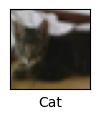

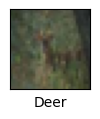

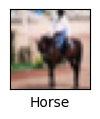

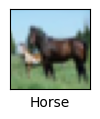

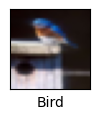

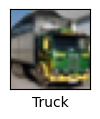

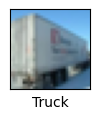

In [4]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

for i in range (16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

    plt.show()

In [5]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images,training_labels, epochs=10, validation_data=(testing_images,testing_labels))

Epoch 1/10
346/625 [===============>..............] - ETA: 11s - loss: 1.8512 - accuracy: 0.3162

In [ ]:
loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifior_model')


125/125 [==============================] - 2s 13ms/step - loss: 1.0698 - accuracy: 0.6382
Loss: 1.0697829723358154
Accuracy: 0.6382499933242798


In [2]:
model=models.load_model('image_classifior_model')

img = cv.imread('car.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
plt. show()
prediction = model.predict (np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

OSError: No file or directory found at image_classifior_model